<a href="https://colab.research.google.com/github/jithendrachowdarybj8185/Sentiment-Analysis-Text-Classification/blob/main/Jithendra_Bojedla_NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import random
import csv
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [128]:
# Load the dataset
file_path = r'/content/drive/MyDrive/NLP/sentiment_train.json'
train_data = pd.read_json(file_path, lines=True)

train_data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc
...,...,...,...,...,...,...,...,...
79995,en_0046316,product_en_0980158,reviewer_en_0629807,5,"Cute slippers, my MIL loved them.",Nice and fit as advertised,en,shoes
79996,en_0956024,product_en_0954574,reviewer_en_0459072,5,My 6 year old likes this and keeps him engaged...,good to keep the kids engaged,en,toy
79997,en_0589358,product_en_0402982,reviewer_en_0199163,5,Replaced my battery with it. Works like new.,This works,en,wireless
79998,en_0970602,product_en_0873374,reviewer_en_0590563,5,"I like them, holding up well.",Well made.,en,industrial_supplies


In [129]:
# Drop the remaining columns that are not important.
columns_to_drop = ['review_id', 'product_id', 'reviewer_id', 'review_body', 'language', 'product_category']
train_data.drop(columns=columns_to_drop, inplace=True)
train_data.head()

,stars,review_title
0,1,I'll spend twice the amount of time boxing up ...
1,1,Not use able
2,1,The product is junk.
3,1,Fucking waste of money
4,1,bubble


In [130]:
# Info about train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stars         80000 non-null  int64 
 1   review_title  80000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [131]:
# Shape of the train dataset
train_data.shape

(80000, 2)

In [132]:
train_data.duplicated().sum()

25162

Data Preprocessing

In [133]:
# lowercasing
train_data['review_title'] = train_data['review_title'].str.lower()
train_data

,stars,review_title
0,1,i'll spend twice the amount of time boxing up ...
1,1,not use able
2,1,the product is junk.
3,1,fucking waste of money
4,1,bubble
...,...,...
79995,5,nice and fit as advertised
79996,5,good to keep the kids engaged
79997,5,this works
79998,5,well made.


In [134]:
# Count of values
train_data['stars'].value_counts()

1    40000
5    40000
Name: stars, dtype: int64

In [135]:
train_data['review_title'].value_counts()

five stars                                                     3900
one star                                                       3419
great product                                                   454
disappointed                                                    288
great                                                           264
                                                               ... 
absolutely not                                                    1
does not work (photo)                                             1
broke the second time                                             1
person needing it passed away and the company would not ...       1
very good for my village lights are bright i love it              1
Name: review_title, Length: 52323, dtype: int64

In [136]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data for tokenization
nltk.download('punkt')

# Function to tokenize text, handling non-string values
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

# Tokenize text using NLTK
train_data['review_title'] = train_data['review_title'].apply(tokenize_text)

print(train_data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       stars                                       review_title
0          1  [i, 'll, spend, twice, the, amount, of, time, ...
1          1                                   [not, use, able]
2          1                        [the, product, is, junk, .]
3          1                        [fucking, waste, of, money]
4          1                                           [bubble]
...      ...                                                ...
79995      5                   [nice, and, fit, as, advertised]
79996      5               [good, to, keep, the, kids, engaged]
79997      5                                      [this, works]
79998      5                                    [well, made, .]
79999      5  [very, good, for, my, village, lights, are, br...

[80000 rows x 2 columns]


In [137]:
# Vectorize the data
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of strings to a single string
train_data['review_title'] = train_data['review_title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Instantiate CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 4))

# Fit and transform the data
final_data = count_vectorizer.fit_transform(train_data['review_title'])


In [138]:
# Removing punctuation
import pandas as pd
import string

def remove_punctuation(input_text):
    translator = str.maketrans('', '', string.punctuation)
    return input_text.translate(translator)

train_data['review_title'] = train_data['review_title'].apply(remove_punctuation)

print(train_data)


       stars                                       review_title
0          1  i ll spend twice the amount of time boxing up ...
1          1                                       not use able
2          1                               the product is junk 
3          1                             fucking waste of money
4          1                                             bubble
...      ...                                                ...
79995      5                         nice and fit as advertised
79996      5                      good to keep the kids engaged
79997      5                                         this works
79998      5                                         well made 
79999      5  very good for my village lights are bright i l...

[80000 rows x 2 columns]


In [139]:
vocab = count_vectorizer.vocabulary_
vocab

{'ll': 164767,
 'spend': 261734,
 'twice': 307247,
 'the': 274989,
 'amount': 9894,
 'of': 199470,
 'time': 296195,
 'boxing': 41059,
 'up': 309494,
 'whole': 328104,
 'useless': 312343,
 'thing': 290000,
 'and': 10722,
 'send': 248245,
 'it': 145417,
 'back': 27332,
 'with': 330095,
 'star': 262941,
 'review': 241299,
 'll spend': 164899,
 'spend twice': 261786,
 'twice the': 307317,
 'the amount': 275274,
 'amount of': 9897,
 'of time': 202265,
 'time boxing': 296291,
 'boxing up': 41062,
 'up the': 309996,
 'the whole': 284657,
 'whole useless': 328190,
 'useless thing': 312472,
 'thing and': 290005,
 'and send': 16296,
 'send it': 248293,
 'it back': 145799,
 'back with': 27605,
 'with star': 331777,
 'star review': 263012,
 'll spend twice': 164900,
 'spend twice the': 261787,
 'twice the amount': 307318,
 'the amount of': 275275,
 'amount of time': 9913,
 'of time boxing': 202275,
 'time boxing up': 296292,
 'boxing up the': 41063,
 'up the whole': 310023,
 'the whole useless': 2

In [140]:
# Selecting all rows and all columns.
# Commonly used when working with NumPy arrays to select or copy all elements along specified dimensions.
questions = final_data[:,:]
questions

<80000x343954 sparse matrix of type '<class 'numpy.int64'>'
	with 849852 stored elements in Compressed Sparse Row format>

In [141]:
# Declare targets variable
targets = train_data['stars'].to_numpy()
targets

array([1, 1, 1, ..., 5, 5, 5])

In [142]:
# Split the train dataset following 80-20 rule
train_X, test_X, train_y, test_y = train_test_split(questions, targets, test_size=0.2, random_state=40, stratify=targets)

Building text classification model - Logistic Regression

In [143]:
# Build the Logistic Regression Model
model = LogisticRegression(C=0.77, class_weight= {1:1,5:1}, solver = 'liblinear', max_iter=10000, penalty = 'l1')

In [144]:
model.fit(train_X, train_y)

LogisticRegression(C=0.77, class_weight={1: 1, 5: 1}, max_iter=10000,
                   penalty='l1', solver='liblinear')

In [145]:
train_yhat = model.predict(train_X)
test_yhat = model.predict(test_X)

In [147]:
# Evaluate the model
print("Accuracy:", accuracy_score(test_y, test_yhat))
print("\nClassification Report:")
print(classification_report(test_y, test_yhat))

Accuracy: 0.9299375

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.91      0.93      8000
           5       0.92      0.95      0.93      8000

    accuracy                           0.93     16000
   macro avg       0.93      0.93      0.93     16000
weighted avg       0.93      0.93      0.93     16000



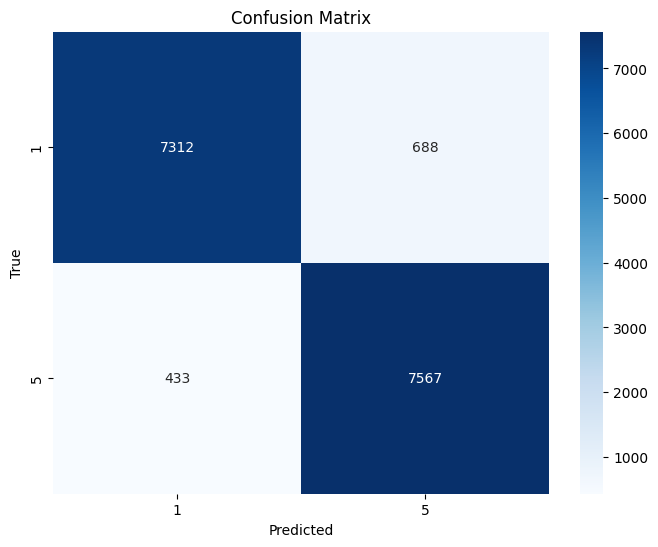

In [148]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, test_yhat), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(train_data['stars'].unique()), yticklabels=sorted(train_data['stars'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [149]:
# F1 score using train data split
metrics.f1_score(train_y, train_yhat)

0.9442693568566587

In [150]:
# F1 score using test data split
metrics.f1_score(test_y, test_yhat)

0.9288027945379486

In [151]:
# Fit the model
model.fit(questions, targets)

LogisticRegression(C=0.77, class_weight={1: 1, 5: 1}, max_iter=10000,
                   penalty='l1', solver='liblinear')

In [152]:
# Load the test dataset
file_path1 = r'/content/drive/MyDrive/NLP/sentiment_test.json'
test_df = pd.read_json(file_path1, lines=True)

test_df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0199937,product_en_0902516,reviewer_en_0097389,1,"These are AWFUL. They are see through, the fab...",Don’t waste your time!,en,apparel
1,en_0863335,product_en_0348072,reviewer_en_0601537,1,I bought 4 and NONE of them worked. Yes I used...,One Star,en,other
2,en_0565010,product_en_0356154,reviewer_en_0970351,1,On first use it didn't heat up and now it does...,Totally useless,en,other
3,en_0963290,product_en_0583322,reviewer_en_0216125,1,You want an HONEST answer? I just returned fro...,Gold filled earrings,en,jewelry
4,en_0238156,product_en_0487636,reviewer_en_0514203,1,The glue works fine but the container is impos...,Poor container,en,industrial_supplies
...,...,...,...,...,...,...,...,...
1995,en_0681530,product_en_0198517,reviewer_en_0539725,5,"It's still early, but so far the scales seems ...",Very sleek.,en,drugstore
1996,en_0157408,product_en_0206198,reviewer_en_0605408,5,I’ve used this face mask a few times now and i...,... face mask a few times now and it works gre...,en,beauty
1997,en_0542558,product_en_0525205,reviewer_en_0727937,5,Great price. Good quality.,Five Stars,en,home
1998,en_0754850,product_en_0613095,reviewer_en_0643466,5,Fits my 2016 F150 XLT great. Now I dont have t...,2016 F150 XLT,en,automotive


In [153]:
# Drop the remaining columns that are not important.
columns_to_drop = ['review_id', 'product_id', 'reviewer_id', 'review_body', 'language', 'product_category']
test_df.drop(columns=columns_to_drop, inplace=True)
test_df.head()

,stars,review_title
0,1,Don’t waste your time!
1,1,One Star
2,1,Totally useless
3,1,Gold filled earrings
4,1,Poor container


In [154]:
# Vectorize the data
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of strings to a single string
test_df['review_title'] = test_df['review_title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Instantiate CountVectorizer
count_vectorizer1 = CountVectorizer(ngram_range=(1, 4))

# Fit and transform the data
final_test_data = count_vectorizer1.fit_transform(test_df['review_title'])

In [155]:
# Removing punctuation
import pandas as pd
import string

def remove_punctuation(input_text):
    translator = str.maketrans('', '', string.punctuation)
    return input_text.translate(translator)

test_df['review_title'] = test_df['review_title'].apply(remove_punctuation)

print(test_df)

      stars                                       review_title
0         1                              Don’t waste your time
1         1                                           One Star
2         1                                    Totally useless
3         1                               Gold filled earrings
4         1                                     Poor container
...     ...                                                ...
1995      5                                         Very sleek
1996      5   face mask a few times now and it works great ...
1997      5                                         Five Stars
1998      5                                      2016 F150 XLT
1999      5                                            Perfect

[2000 rows x 2 columns]


In [156]:
# Selecting all rows and all columns.
# Commonly used when working with NumPy arrays to select or copy all elements along specified dimensions.
test_questions = final_test_data[:,:]
test_questions

<2000x13427 sparse matrix of type '<class 'numpy.int64'>'
	with 21355 stored elements in Compressed Sparse Row format>

In [157]:
# Declare targets variable
targets = test_df['stars'].to_numpy()
targets

array([1, 1, 1, ..., 5, 5, 5])

In [158]:
# Split the train dataset following 80-20 rule
train_X, test_X, train_y, test_y = train_test_split(test_questions, targets, test_size=0.2, random_state=40, stratify=targets)

In [159]:
model.fit(train_X, train_y)

LogisticRegression(C=0.77, class_weight={1: 1, 5: 1}, max_iter=10000,
                   penalty='l1', solver='liblinear')

In [160]:
train_yhat1 = model.predict(train_X)
test_yhat1 = model.predict(test_X)

In [161]:
# Evaluate the model
print("Accuracy:", accuracy_score(test_y, test_yhat1))
print("\nClassification Report:")
print(classification_report(test_y, test_yhat1))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.77      0.84       200
           5       0.80      0.94      0.86       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



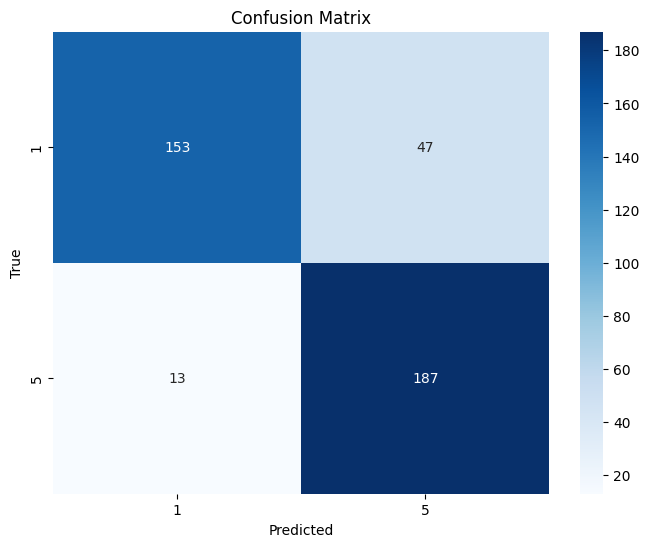

In [162]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, test_yhat1), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(test_df['stars'].unique()), yticklabels=sorted(test_df['stars'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [163]:
# F1 score using train data split
metrics.f1_score(train_y, train_yhat1)

0.888888888888889

In [164]:
# F1 score using test data split
metrics.f1_score(test_y, test_yhat1)

0.8360655737704918

Naive Bayes Model


In [165]:
# For train dataset:
# Selecting all rows and all columns.
# Commonly used when working with NumPy arrays to select or copy all elements along specified dimensions.
questions = final_data[:,:]
# Declare targets variable
targets = train_data['stars'].to_numpy()
# Split the train dataset following 80-20 rule
train_X, test_X, train_y, test_y = train_test_split(questions, targets, test_size=0.2, random_state=40, stratify=targets)

In [166]:
# Train the model (using Naive Bayes as an example)
nb_classifier = MultinomialNB()
nb_classifier.fit(train_X, train_y)
# Predictions
y_pred = nb_classifier.predict(test_X)
y_pred

array([5, 1, 5, ..., 5, 1, 5])

In [167]:
# Evaluate the model
print("Accuracy:", accuracy_score(test_y, y_pred))
print("\nClassification Report:")
print(classification_report(test_y, y_pred))

Accuracy: 0.9295

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.93      0.93      8000
           5       0.93      0.93      0.93      8000

    accuracy                           0.93     16000
   macro avg       0.93      0.93      0.93     16000
weighted avg       0.93      0.93      0.93     16000



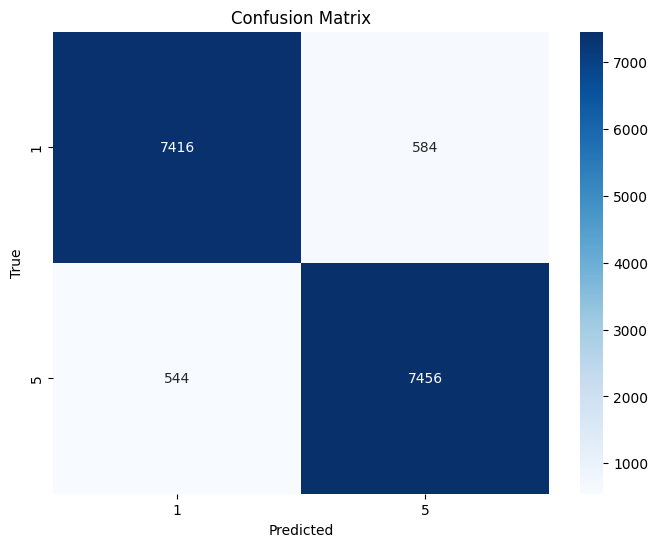

In [168]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(test_df['stars'].unique()), yticklabels=sorted(test_df['stars'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [169]:
# For test dataset:
test_df.head()

,stars,review_title
0,1,Don’t waste your time
1,1,One Star
2,1,Totally useless
3,1,Gold filled earrings
4,1,Poor container


In [170]:
# Vectorize the data
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of strings to a single string
test_df['review_title'] = test_df['review_title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Instantiate CountVectorizer
count_vectorizer1 = CountVectorizer(ngram_range=(1, 4))

# Fit and transform the data
final_test_data = count_vectorizer1.fit_transform(test_df['review_title'])

In [171]:
# Selecting all rows and all columns.
# Commonly used when working with NumPy arrays to select or copy all elements along specified dimensions.
test_questions = final_test_data[:,:]
# Declare targets variable
targets = test_df['stars'].to_numpy()
# Split the train dataset following 80-20 rule
train_X, test_X, train_y, test_y = train_test_split(test_questions, targets, test_size=0.2, random_state=40, stratify=targets)

In [172]:
nb_classifier.fit(train_X, train_y)

MultinomialNB()

In [173]:
train_yhat2 = nb_classifier.predict(train_X)
test_yhat2 = nb_classifier.predict(test_X)

In [174]:
# Evaluate the model
print("Accuracy:", accuracy_score(test_y, test_yhat2))
print("\nClassification Report:")
print(classification_report(test_y, test_yhat2))

Accuracy: 0.875

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.86      0.87       200
           5       0.87      0.89      0.88       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.88      0.87       400



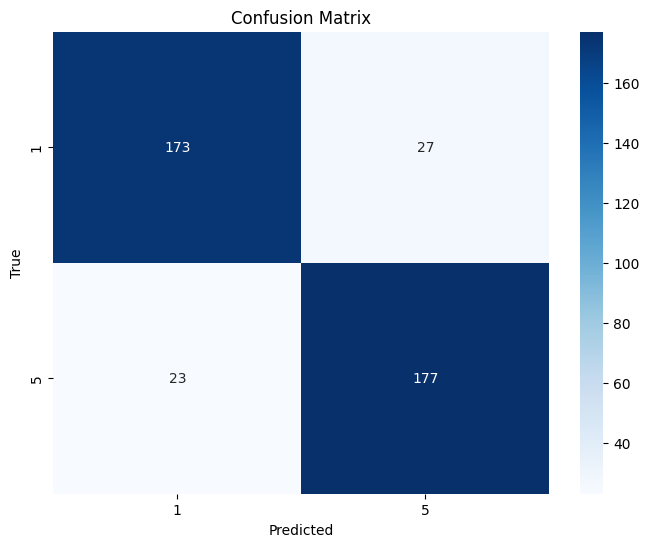

In [175]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, test_yhat2), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(test_df['stars'].unique()), yticklabels=sorted(test_df['stars'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [146]:
#test the dynamic inputs
feedbacks = ["It is not a good product, dont buy it!!", "it is worth it", "It is fully damaged one", "Useless product, waste of money"]
random_feedback = random.choice(feedbacks)
count_vectorizer = CountVectorizer(ngram_range=(1,4), vocabulary=vocab)
dynamic_data = count_vectorizer.fit_transform([random_feedback])
d_hat = model.predict(dynamic_data)
if d_hat[0]==1:
    print(f"{random_feedback}  :  negative feedback")
if d_hat[0]==5:
    print(f"{random_feedback} : positive feedback")

Useless product, waste of money  :  negative feedback


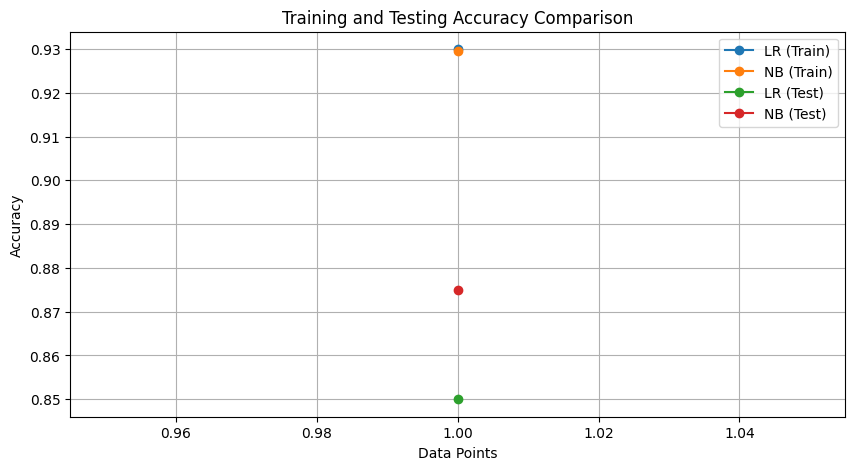

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists or arrays containing accuracy values for each algorithm
train_acc_LR = [0.9299375]  # Training accuracy for algorithm 1
test_acc_LR = [0.85]   # Testing accuracy for algorithm 1

train_acc_NB = [0.9295]  # Training accuracy for algorithm 2
test_acc_NB = [0.875]   # Testing accuracy for algorithm 2

# Create x-axis values based on the number of data points
num_data_points = len(train_acc_LR)
x_values = np.arange(1, num_data_points + 1)

# Plotting the training accuracy
plt.figure(figsize=(10, 5))
plt.plot(x_values, train_acc_LR, label='LR (Train)', marker='o')
plt.plot(x_values, train_acc_NB, label='NB (Train)', marker='o')

# Plotting the testing accuracy
plt.plot(x_values, test_acc_LR, label='LR (Test)', marker='o')
plt.plot(x_values, test_acc_NB, label='NB (Test)', marker='o')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.legend()  # Show legend

# Display the plot
plt.grid(True)
plt.show()


In [178]:
!pip install nbconvert
!jupyter nbconvert --to pdf updated_NLP.ipynb

[NbConvertApp] WARNING | pattern 'updated_NLP.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   

In [39]:
# Suggestions for improving the model’s performance
# Ensemble methods such as Bagging and Boosting can be applied to improve the model's performance.
# Underfitting and overfitting is to be detected.